<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://gitlab.com/sabahuddin.ahmad" target="_blank"> Sabah Ud Din Ahmad </a> and Özlem Salehi</td>
    </tr> 
 </table>
 
<hr>

# <font color="blue"> Solutions for </font> QUBO Formulation for TSP

<a id="task1"></a>

### Task 1

Verify the following observations for the second term:

- Each $x_{i,t}$ appears with coefficient -1
- For each fixed $i$, all possible 2-combinations of $x_{i,t}$ appears with coefficient +1
- There is a constant coefficeint of +3

<h3> Solution </h3>

Let us copy the second term here:

$$P \cdot\sum_{i=0}^{2} \left(1 - (x_{i,0}+x_{i,1}+x_{i,2})\right)^2$$
Expanding the sum we obtain,
$$P \cdot \left[\left(1 - (x_{0,0}+x_{0,1}+x_{0,2})\right)^2+\left(1 - (x_{1,0}+x_{1,1}+x_{1,2})\right)^2+\left(1 - (x_{2,0}+x_{2,1}+x_{2,2})\right)^2\right]$$

Let us check $\left(1 - (x_{0,0}+x_{0,1}+x_{0,2})\right)^2$.

$$ 
\left(1 - x_{0,0}-x_{0,1}-x_{0,2}\right)^2= 1 + x_{0,0}^2 + x_{0,1}^2 + x_{0,2}^2 - 2x_{0,0}-2x_{0,1}-2x_{0,2} +2x_{0,0}x_{0,1}+2x_{0,0}x_{0,2} + 2x_{0,1}x_{0,2}.
$$


This can be simplified by replacing the quadratic terms $x_{i,t}^2$ by $x_{i,t}$.


$$ 
1 -x_{0,0}-x_{0,1}-x_{0,2} +2x_{0,0}x_{0,1}+2x_{0,0}x_{0,2} +  2x_{0,1}x_{0,2}
$$


Note that each term $x_{0,t}$ is appearing once with the coefficient -1 and we have all possible 2-combinations of $x_{0,t}$ as quadratic terms with coefficient +2. In addition, we have a constant of +1. 

The same structure will be valid for $\left(1 - (x_{1,0}+x_{1,1}+x_{1,2})\right)^2$ and $\left(1 - (x_{2,0}+x_{2,1}+x_{2,2})\right)^2$.

So for the second term we have the following:
- Each $x_{i,t}$ appears with coefficient -1
- For each fixed $i$, all possible 2-combinations of $x_{i,t}$ appears with coefficient +2.
- There is a constant coefficeint of +3

<a id="task2"></a>
### Task 2

You are given the weights $w_{ij}$ as a cost matrix in the following cell. Assuming $P=20$, create the above $Q$ matrix using numpy. Use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$.

<h3> Solution </h3>

In [26]:
# Access the qubo_solver() function
%run qubo_functions.py

In [74]:
import numpy as np

W = np.array([[0,10,7],
             [15,0,9],
             [14,8,0]])

In [75]:
# Set P
P = 20

# Define Q matrix
Q = np.array([
[-2*P  ,2*P   ,2*P   ,2*P     ,W[0][1] ,W[1][0] ,2*P     ,W[0][2] ,W[2][0]],
[0     ,-2*P  ,2*P   ,W[1][0] ,2*P     ,W[0][1] ,W[2][0] ,2*P     ,W[0][2]],
[0     ,0     ,-2*P  ,W[0][1] ,W[1][0] ,2*P     ,W[0][2] ,W[2][0] ,2*P    ],
[0     ,0     ,0     ,-2*P    ,2*P     ,2*P     ,2*P     ,W[1][2] ,W[2][1]],
[0     ,0     ,0     ,0       ,-2*P    ,2*P     ,W[2][1] ,2*P     ,W[1][2]],
[0     ,0     ,0     ,0       ,0       ,-2*P    ,W[1][2] ,W[2][1] ,2*P    ],
[0     ,0     ,0     ,0       ,0       ,0       ,-2*P    ,2*P     ,2*P    ],
[0     ,0     ,0     ,0       ,0       ,0       ,0       ,-2*P    ,2*P    ],
[0     ,0     ,0     ,0       ,0       ,0       ,0       ,0       ,-2*P   ]
]    
)

In [55]:
qubo_solver(Q)

'The vector (1, 0, 0, 0, 0, 1, 0, 1, 0) minimizes the objective function to a value of -90.'

<a id="task3"></a>
### Task 3 (Optional)


Create the above matrix $Q$ using numpy and for loops instead of hardcoding the values. Create a function that takes as parameter the number of cities $n$, the cost matrix $W$ and penalty value $P$ and returns $Q$. Verify that you obtain the same matrix as in Task 2.

Hint:
- Set the diagonals
- Set the entries sharing same time index
- Set the entries sharing same node
- Set the entries for consecutive time points

<h3> Solution </h3>

We will go through the $n^2$ rows and columns in the matrix.

Diagonals correspond to entries sharing the same row and column number.

Note that for row `i` and column `j`, `i//n` and `j//n` give the node number and `i&n` and `j%n` give the time point.

The matrix is constructed based on this observation.

In [9]:
def tsp_matrix(n, W, P):
    # Initialize an empty matrix
    Q = np.zeros((n*n,n*n))

    for i in range(n*n):
        for j in range(i,n*n):
            # Diagonals
            if i==j:
                Q[i][j]=-2*P
            else:
                # If share the same node or time point
                if i//n == j//n or i%n == j%n:
                    Q[i][j]=2*P
                # If entries in row i and column j correspond to consecutive time points
                elif j%n == i%n +1 or i%n == n-1 and j%n == 0:
                    Q[i][j]=W[i//n][j//n]
                elif j%n == i%n -1 or i%n == 0  and j%n == n-1:
                    Q[i][j]=W[j//n][i//n]
    return Q   

In [87]:
Q1 = tsp_matrix(3, W, 20)
np.array_equal(Q1,Q)

False

<a id="task4"></a>

### Task 4 (Optional)

Let's assume we have the following fully-connected, undirected graph of 4 nodes/cities and 6 edges, $G = (4,6)$. 

<img src="../images/tsp_1.png" width="250">

Using the function you created in Task 3, obtain matrix $Q$ for the given graph and use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. Interpret the result.

### Solution

In [83]:
# Access the qubo_solver() function
%run qubo_functions.py

In [88]:
import numpy as np

#define W
W2 = np.array([[0,12,14,17],
             [12,0,15,18],
             [14,15,0,29],
             [17,18,29,0]])

In [90]:
# Set P
P = 30
# Set n
n = 4
# Obtain Q matrix
Q2 = tsp_matrix(n, W2, P)

In [91]:
qubo_solver(Q2)

'The vector (1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1) minimizes the objective function to a value of -176.0.'

The entries that are 1 in the vector returned by the `qubo_solver` corresponds to binary variables $x_{0,0},x_{1,2},x_{2,1},x_{3,3}$.

This corresponds to the tour $0-2-1-3-0$.

Note that the offset is $30\cdot8 = 240$ and the objective value is 64 which corresponds to the cost of the tour. You can verify that 64 is the cost of the tour by adding the cost of the edges $(0-2), (2-1), (1-3), (3-0)$ as well.


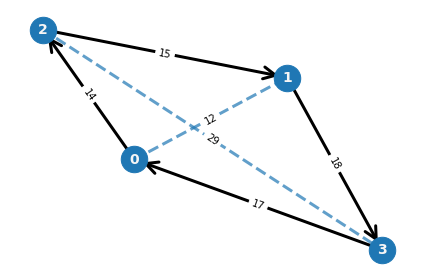

In [4]:
from bqm_utils import tsp_viz
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(
    [(0, 1, 12), (0, 2, 14), (0, 3, 17), (1, 2, 15), (1, 3, 18), (2, 3, 29)]
)
path = [0,2,1,3]
tsp_viz(G, path)

<a id="task5"></a>

### Task 5 (Optional)

Let's assume we have the following fully-connected, undirected graph $G$ of 4 nodes/cities and 6 edges. 

<img src="../images/tsp_2.png" width="250">

Using the function you created in Task 3, obtain matrix $Q$ for the given graph and use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. Interpret the result.

Note: You may not be able to solve it depending on your computer's performance.

### Solution

In [13]:
# Access the qubo_solver() function
%run qubo_functions.py

In [14]:
import numpy as np

#define W
W3 = np.array([[0 ,12,10,19,8],
               [12,0 ,3 ,7 ,2],
               [10,3 ,0 ,6,20],
               [19,7 ,6 ,0 ,4],
               [8 ,2 ,20,4 ,0],
              ])

In [15]:
# Set P
P = 30
# Set n
n = 5
# Obtain Q matrix
Q3 = tsp_matrix(n, W3, P)

In [16]:
qubo_solver(Q3)

'The vector (1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1) minimizes the objective function to a value of -268.0.'

<a id="task6"></a>
### Task 6

Assuming that node 0 is the first node in the tour, obtain the new $4\times4$ matrix $Q$ for the above graph. Create a numpy matrix and find the vector that minimizes $x^TQx$ using the `qubo_solver` function. Interpret the result.

### Solution

$$Q=
\begin{pmatrix}
       &x_{1,1}   &x_{1,2}    &x_{2,1}     & x_{2,2}   \\
x_{1,1}&-2P+w_{01}& 2P        & 2P         & w_{12}    \\
x_{1,2}&  0       & -2P+w_{10}& w_{21}     & 2P        \\
x_{2,1}& 0        & 0         & -2P+w_{02} & 2P        \\
x_{2,2}& 0        & 0         & 0          & -2P+w_{20}\\
\end{pmatrix}$$


In [2]:
# Access the qubo_solver() function
%run qubo_functions.py

In [3]:
import numpy as np

W = np.array([[0,10,7],
             [15,0,9],
             [14,8,0]])

In [5]:
# Set P
P = 20

# Define Q matrix
Q = np.array([
[-2*P+W[0][1] ,2*P          ,2*P          ,W[1][2]     ],
[0            ,-2*P+W[1][0] ,W[2][1]      ,2*P         ],
[0            ,0            ,-2*P+W[0][2] ,2*P         ],
[0            ,0            ,0            ,-2*P+W[2][0]],
]    
)

In [6]:
qubo_solver(Q)

'The vector (0, 1, 1, 0) minimizes the objective function to a value of -50.'

From the vector, we deduce that $x_{1,2}=1$ and $x_{2,1}=1$. Hence the corresponding route is $0-2-1$.

Note that the offset is $4P=80$ and the objective value is 30 which is the cost of the tour.